In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from client.image_data_generator import ImageDataGenerator

In [2]:
DATASET_PATH = "./images-data1/"
TEST_DATASET_PATH = "./images-data1-test/"
MASK_PATH = "./images-data1-mask/mask-2.mat"

EMBEDDING_FEATURE_DIM = 128

EPOCHS = 10
BATCH_SIZE = 4

In [3]:
train_data = ImageDataGenerator(dataset_path=DATASET_PATH, mask_path=MASK_PATH)
test_data = ImageDataGenerator(dataset_path=TEST_DATASET_PATH, mask_path=MASK_PATH)

2023-12-05 16:18:34.212232: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-05 16:18:34.212268: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-05 16:18:34.212271: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-05 16:18:34.212353: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-05 16:18:34.212542: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
train_ds = (
    tf.data.Dataset.from_generator(
        train_data,
        output_types=(tf.float32, tf.float32),
        output_shapes=(
            tf.TensorShape([EMBEDDING_FEATURE_DIM]),
            tf.TensorShape([EMBEDDING_FEATURE_DIM]),
        ),
    )
    .shuffle(1000)
    .batch(BATCH_SIZE)
)


test_ds = tf.data.Dataset.from_generator(
    test_data,
    output_types=(tf.float32, tf.float32),
    output_shapes=(
        tf.TensorShape([EMBEDDING_FEATURE_DIM]),
        tf.TensorShape([EMBEDDING_FEATURE_DIM]),
    ),
).batch(1)

In [5]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(EMBEDDING_FEATURE_DIM)),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(2, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(EMBEDDING_FEATURE_DIM),
    ]
)

model.compile(loss="mse", optimizer="adam", metrics="mse")

In [6]:
model.fit(train_ds, epochs=EPOCHS)

Epoch 1/10


2023-12-05 16:18:35.861417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG d

41/41 [==============================] - 5s 9ms/step - loss: 0.0289 - mse: 0.0289
Epoch 2/10


2023-12-05 16:18:41.155516: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 15079016390487085575
2023-12-05 16:18:41.155542: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11465487294604780767
2023-12-05 16:18:41.155558: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 17592084515979290021
2023-12-05 16:18:41.155564: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14159369494757042149
2023-12-05 16:18:41.155818: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 1539037130036939448
2023-12-05 16:18:41.155826: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 2028843571395921794
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0

 8/41 [====>.........................] - ETA: 0s - loss: 0.0180 - mse: 0.0180  

Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9


41/41 [==============================] - 4s 7ms/step - loss: 0.0147 - mse: 0.0147
Epoch 3/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG d

16/41 [==========>...................] - ETA: 0s - loss: 0.0113 - mse: 0.0113 

Corrupt JPEG data: 6 extraneous bytes before marker 0xd9


41/41 [==============================] - 4s 7ms/step - loss: 0.0100 - mse: 0.0100
Epoch 4/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG d

17/41 [===========>..................] - ETA: 0s - loss: 0.0090 - mse: 0.0090 

Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9


41/41 [==============================] - 4s 7ms/step - loss: 0.0083 - mse: 0.0083
Epoch 5/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG d

 6/41 [===>..........................] - ETA: 0s - loss: 0.0074 - mse: 0.0074  

Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9


41/41 [==============================] - 4s 7ms/step - loss: 0.0076 - mse: 0.0076
Epoch 6/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG d

17/41 [===========>..................] - ETA: 0s - loss: 0.0073 - mse: 0.0073 

Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9


41/41 [==============================] - 4s 7ms/step - loss: 0.0073 - mse: 0.0073
Epoch 7/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG d

17/41 [===========>..................] - ETA: 0s - loss: 0.0073 - mse: 0.0073 

Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9


41/41 [==============================] - 4s 7ms/step - loss: 0.0070 - mse: 0.0070
Epoch 8/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG d

17/41 [===========>..................] - ETA: 0s - loss: 0.0070 - mse: 0.0070 

Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9


41/41 [==============================] - 4s 7ms/step - loss: 0.0068 - mse: 0.0068
Epoch 9/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG d

 8/41 [====>.........................] - ETA: 0s - loss: 0.0063 - mse: 0.0063  

Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9


41/41 [==============================] - 4s 8ms/step - loss: 0.0065 - mse: 0.0065
Epoch 10/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG d

 8/41 [====>.........................] - ETA: 0s - loss: 0.0061 - mse: 0.0061  

Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: 6 extraneous bytes before marker 0xd9


41/41 [==============================] - 4s 9ms/step - loss: 0.0062 - mse: 0.0062


Corrupt JPEG data: premature end of data segment


1/1 [==============================] - 0s 69ms/step


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


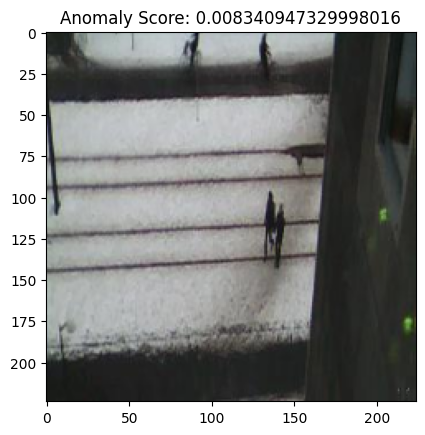

1/1 [==============================] - 0s 17ms/step


Corrupt JPEG data: 6 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


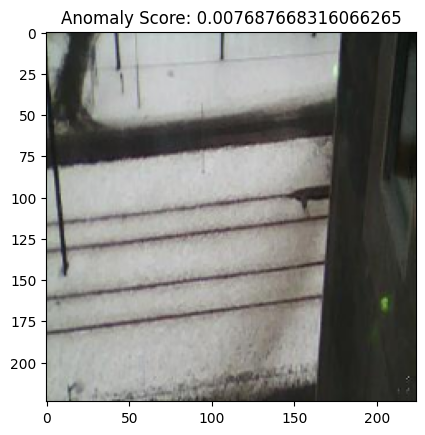

1/1 [==============================] - 0s 19ms/step


Corrupt JPEG data: 6 extraneous bytes before marker 0xd9


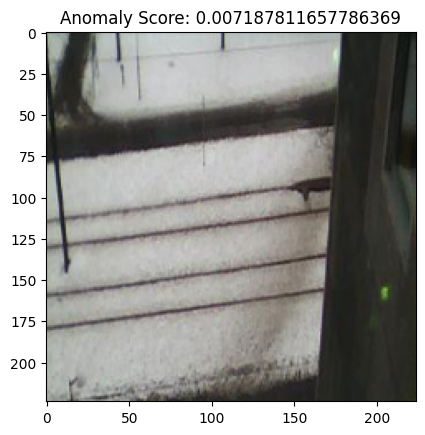

1/1 [==============================] - 0s 18ms/step


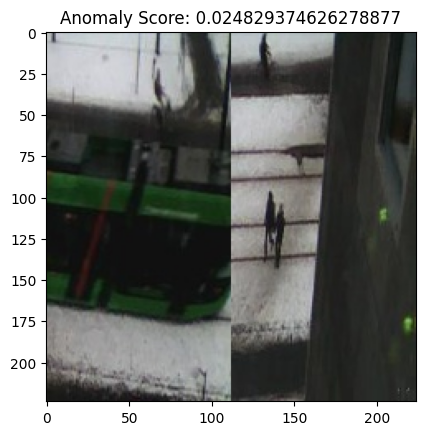

1/1 [==============================] - 0s 24ms/step


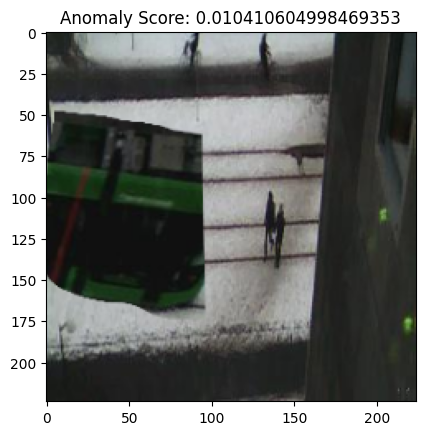

1/1 [==============================] - 0s 13ms/step


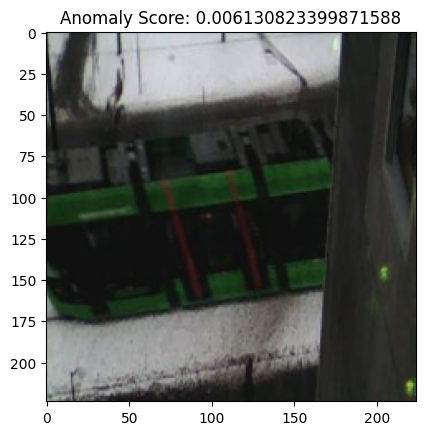

In [7]:
for ix, (x, y) in enumerate(test_ds):
    pred = model.predict(x)

    score = tf.reduce_mean(tf.math.square(x - pred))

    plt.figure()
    plt.imshow(test_data.get_image(ix, apply_mask=False))
    plt.title(f"Anomaly Score: {score}")
    plt.show()